# Cost benefit visualization
A firm needs to buy 8 products (Model 0 - Model 7) in various quantity. It can buy either from seller A or from B. A given product might be cheaper when bought from A or from B. The firm chooses one seller to buy all the products it needs. 

The visualization below shows that what matters is, for each product, not only its price but also the quantity bought. To see which seller is more advantageous, the total green area (seller A is cheaper) can easily be compared to the total red area (seller B is cheaper) to get a visual impression of the costs and benefits from buying from A versus B. 

(This is inspired from consulting work for the UNHCR I did in 2018)

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
# %matplotlib inline

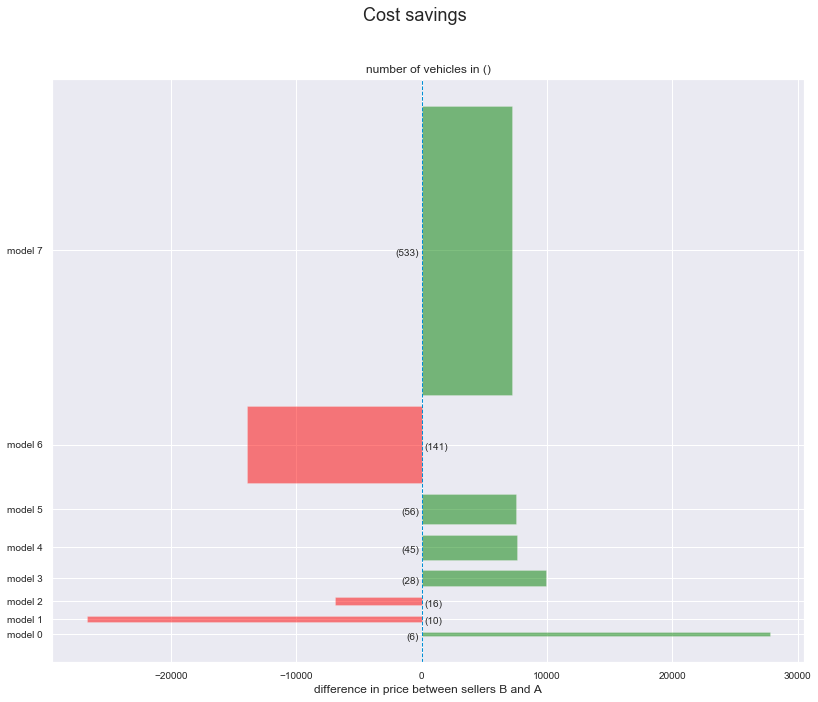

In [11]:
sns.set()

table = pd.read_csv('table.csv', index_col=0)
table['pos_labels'] = table['number of vehicles'].cumsum() - table['number of vehicles']/2
table['pos_bars'] = table['pos_labels'] + np.arange(0, table.shape[0])*20
table['cost savings'] = table['price seller B'] - table['price seller A']

fig, ax = plt.subplots(figsize=(12, 10))
fig.set_facecolor("w")
plt.style.use('fivethirtyeight')
list_color = []

for num_cars, y, cost_save in zip(table['number of vehicles'], table['pos_bars'], table['cost savings']):    
    if cost_save > 0:
        ax.text(x = -200, y = y-10, s = '({})'.format(num_cars), fontsize = 10, ha = 'right')
        list_color.append('green')
    else:
        ax.text(x = 200, y = y-10, s = '({})'.format(num_cars), fontsize = 10, ha = 'left')
        list_color.append('red')

ax.barh(table['pos_bars'], table['cost savings'], table['number of vehicles'], color = list_color, alpha = 0.5)
plt.axvline(x = 0, linestyle = '--', linewidth = 1)
plt.title('number of vehicles in ()', fontsize = 12)
plt.suptitle('Cost savings', fontsize = 18)
plt.xlabel('difference in price between sellers B and A', fontsize = 12)
plt.yticks(table['pos_bars'], table.index, fontsize = 10)
plt.xticks(fontsize = 10)

plt.savefig('cost_benefit.pdf', facecolor='w', bbox_inches="tight", dpi=600)
plt.show()
